In [1]:
# Importing The libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Loading The Dataset

df = pd.read_csv('Data.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Preprocessing

In [3]:
# Checking Shape Of The Dataset

df.shape

(36275, 19)

In [4]:
# Dropping Identifier Column

df.drop(['Booking_ID'], axis=1, inplace=True)

In [5]:
df['date of arrival'] = df['arrival_year'].astype(str) + '/' + df['arrival_month'].astype(str) + '/' + df['arrival_date'].astype(str)

# Type Casting The Date Column

df['date of arrival'] = pd.to_datetime(df['date of arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)

# Dropping The Columns

df.drop(columns=['arrival_date', 'arrival_month', 'arrival_year'], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8448\995544160.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date of arrival'] = pd.to_datetime(df['date of arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)


In [6]:
# Checking For Null Values

df.isnull().sum()

no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
date of arrival                         37
dtype: int64

In [7]:
df.dropna(inplace=True)
df.reset_index()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36233,36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03
36234,36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled,2018-10-17
36235,36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01
36236,36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled,2018-04-21


In [8]:
# Checking Data Types

df.dtypes

no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
type_of_meal_plan                               object
required_car_parking_space                       int64
room_type_reserved                              object
lead_time                                        int64
market_segment_type                             object
repeated_guest                                   int64
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_per_room                             float64
no_of_special_requests                           int64
booking_status                                  object
date of arrival                         datetime64[ns]
dtype: object

In [9]:
# Checking For Unique Values In Each Column

df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3919
no_of_special_requests                     6
booking_status                             2
date of arrival                          549
dtype: int64

Descriptive Statistics

In [10]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date of arrival
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238
mean,1.845301,0.105221,0.810475,2.204206,0.030934,85.275070,0.025553,0.023346,0.152961,103.437259,0.619957,2018-05-24 16:37:29.130746880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518572,0.402540,0.870992,1.410784,0.173142,85.953561,0.157801,0.368483,1.753366,35.084264,0.786403,NaN


Here the minimum average price per room and number of adults is zero, which is not possible so, I will replace the price with with mean value and drop the rows with zero adults.

In [11]:
df['avg_price_per_room'].replace(0,df['avg_price_per_room'].mean(), inplace=True)

In [12]:
# Drop Where Adults Are 0

df.drop(df[df['no_of_adults'] == 0].index, inplace = True)

In [13]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11


## Exploratory Data Analysis

### Guest Information

Text(0.5, 1.0, 'Number of Children')

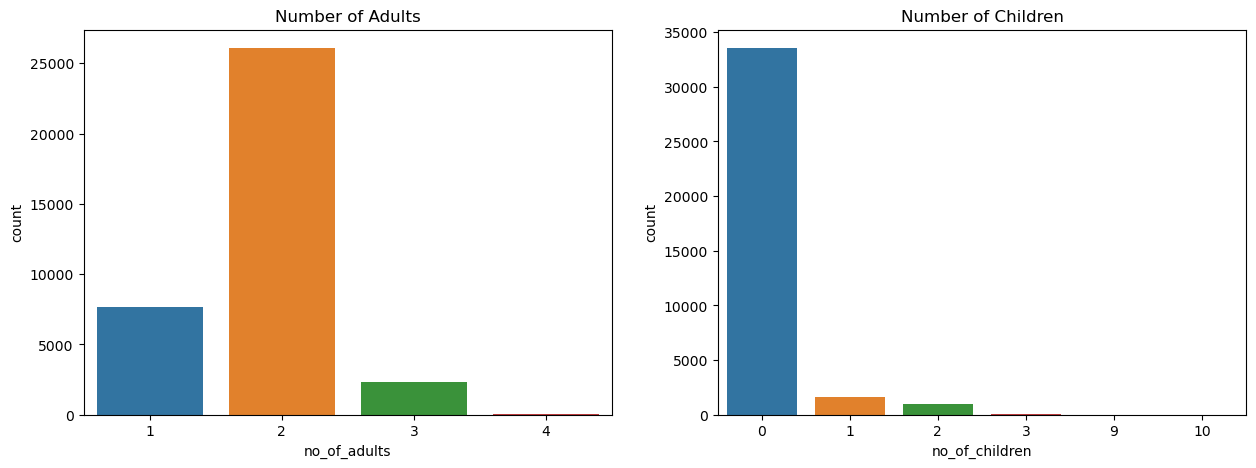

In [14]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = df, ax=ax[0]).set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = df, ax=ax[1]).set_title('Number of Children')

### Time Spent At Hotel

Text(0.5, 1.0, 'Number of Week Nights')

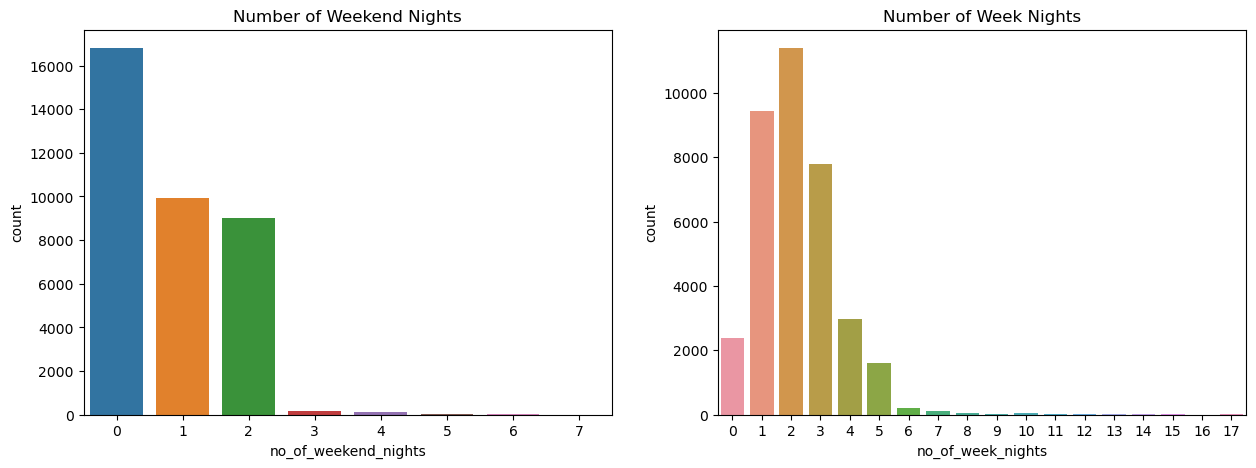

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = df, ax=ax[0]).set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = df, ax=ax[1]).set_title('Number of Week Nights')

### Date of Arrival

Text(0.5, 1.0, 'Day of week of arrival')

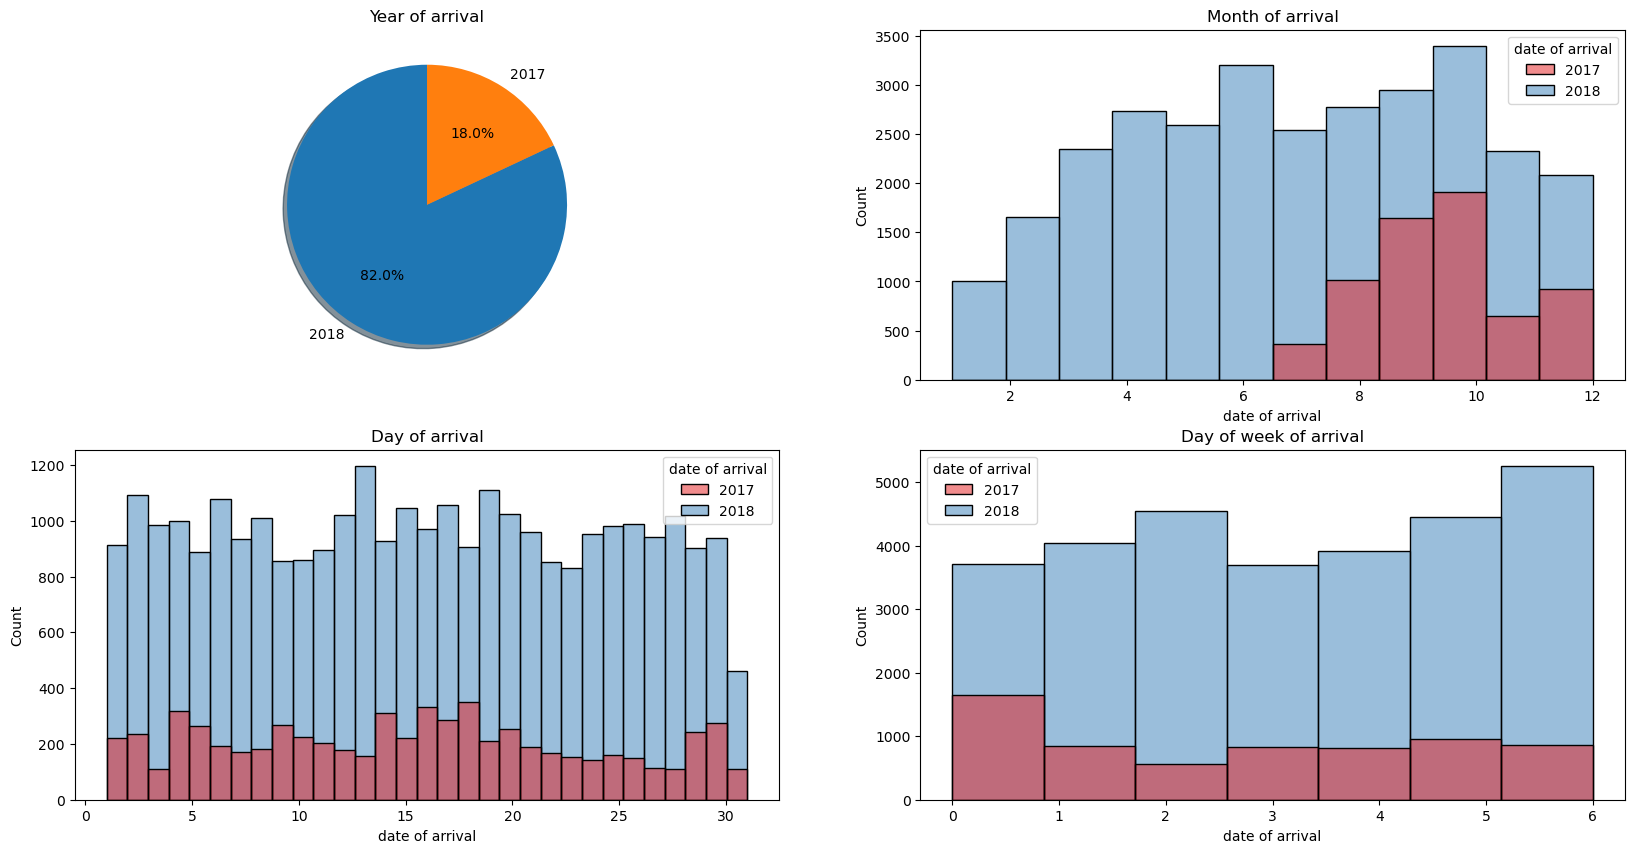

In [16]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

# Year of Arrival

ax[0,0].pie(df['date of arrival'].dt.year.value_counts(), labels = [2018,2017], autopct='%1.1f%%', shadow=True, startangle=90)
ax[0,0].set_title('Year of arrival')


# Month of Arrival   

sns.histplot(x = df['date of arrival'].dt.month, ax=ax[0,1], bins=12, hue = df['date of arrival'].dt.year, palette = 'Set1').set_title('Month of arrival')


# Day of Arrival

sns.histplot(x = df['date of arrival'].dt.day, ax=ax[1,0], bins=31, hue = df['date of arrival'].dt.year, palette = 'Set1').set_title('Day of arrival')


# Day of Week of Arrival

sns.histplot(x = df['date of arrival'].dt.dayofweek, ax=ax[1,1], bins=7, hue = df['date of arrival'].dt.year, palette = 'Set1').set_title('Day of week of arrival')

### Services 

Text(0.5, 1.0, 'Number of special requests')

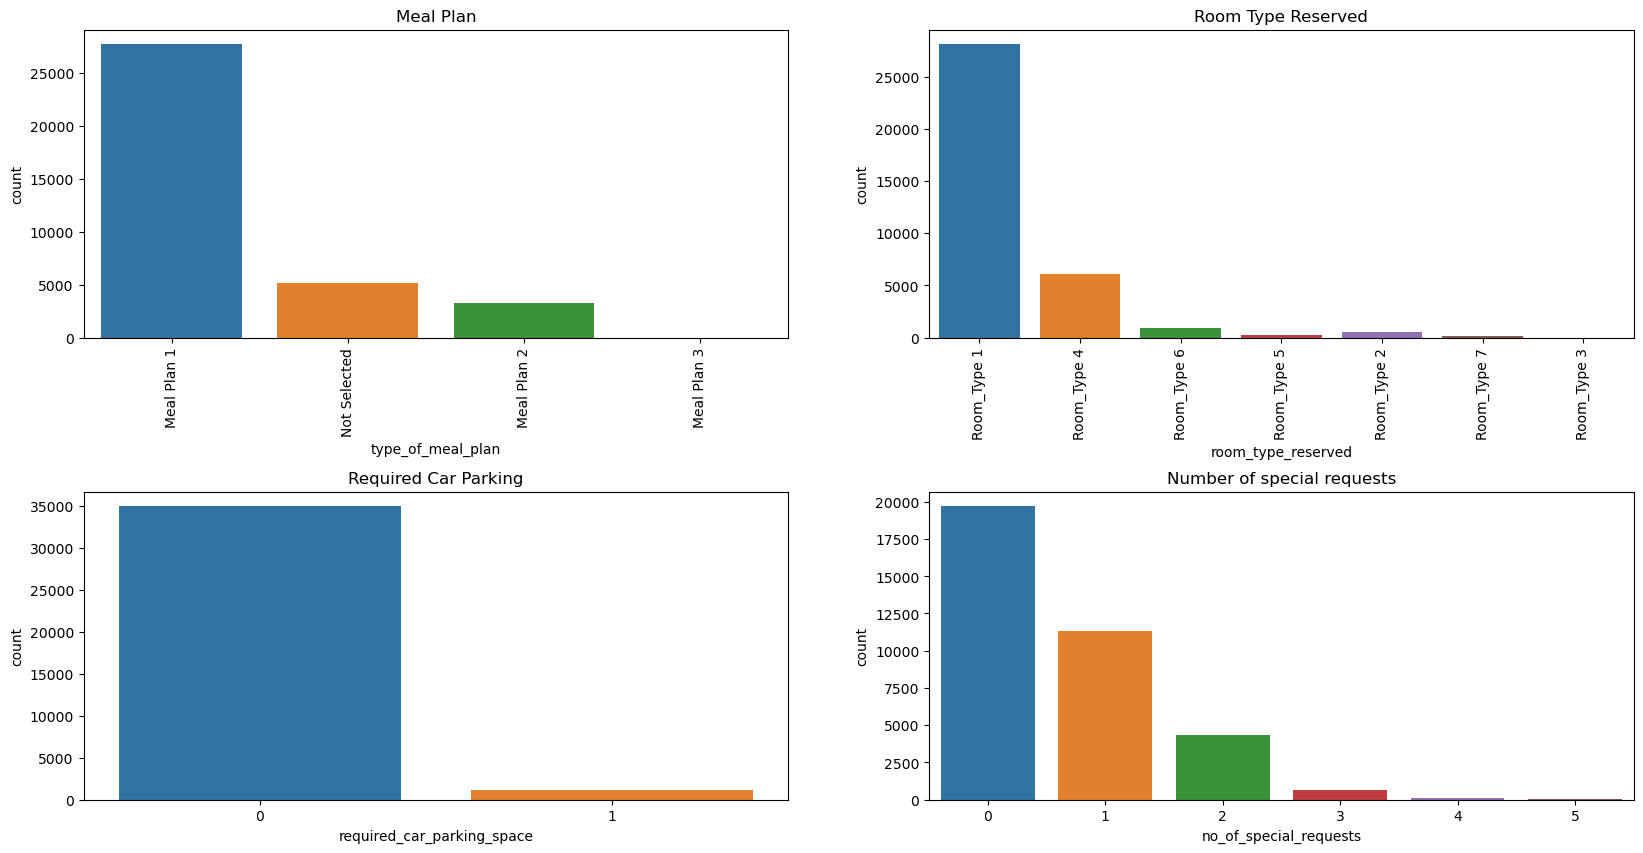

In [17]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x = 'type_of_meal_plan', data = df, ax=ax[0,0]).set_title('Meal Plan')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'room_type_reserved', data = df, ax=ax[0,1]).set_title('Room Type Reserved')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'required_car_parking_space', data = df, ax=ax[1,0]).set_title('Required Car Parking')

sns.countplot(x = 'no_of_special_requests', data = df, ax=ax[1,1]).set_title('Number of special requests')

### Lead Time (Days Between Date of Reservation & Date of Arrival)

Text(0.5, 1.0, 'Lead Time in days')

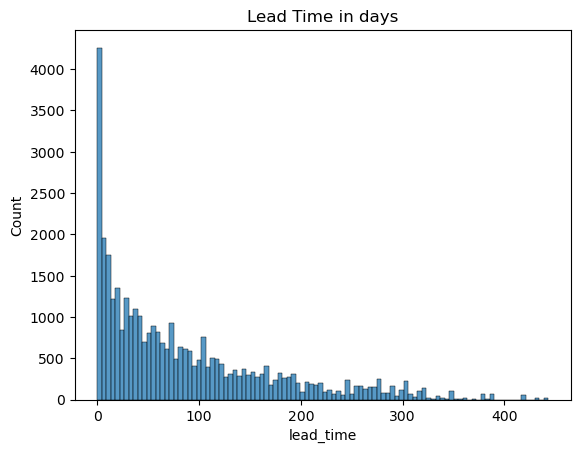

In [18]:
sns.histplot(x = 'lead_time', data = df, bins=100).set_title('Lead Time in days')

### Market Segment

Text(0.5, 1.0, 'Market Segment Type')

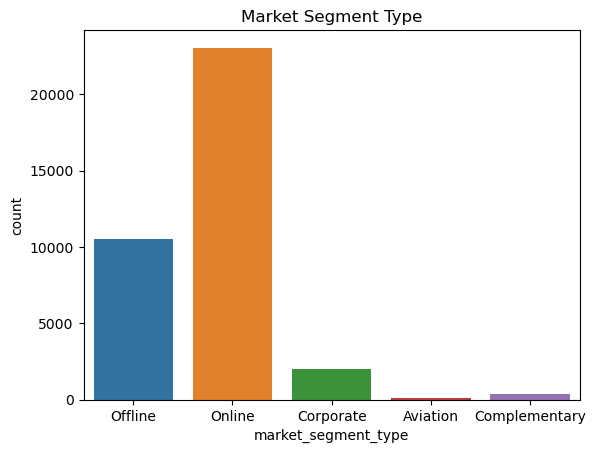

In [19]:
sns.countplot(x = 'market_segment_type', data = df).set_title('Market Segment Type')

### Guest's Previous Experience With The Hotel

Text(0.5, 1.0, 'Number of Previous Bookings Not Cancelled')

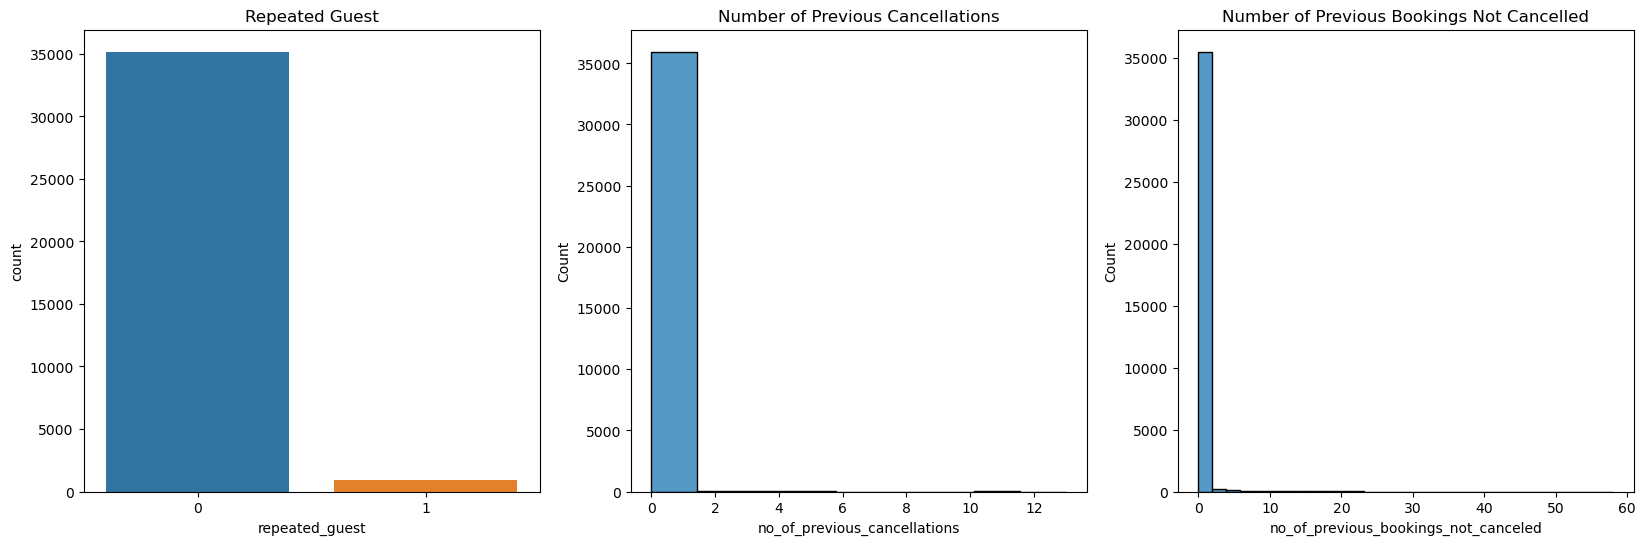

In [20]:
fig, ax = plt.subplots(1,3,figsize=(20,6))

sns.countplot(x = 'repeated_guest', data = df, ax=ax[0]).set_title('Repeated Guest')

sns.histplot(x = 'no_of_previous_cancellations', data = df, ax=ax[1], bins = 9).set_title('Number of Previous Cancellations')

sns.histplot(x = 'no_of_previous_bookings_not_canceled', data = df, ax=ax[2], bins = 30).set_title('Number of Previous Bookings Not Cancelled')

### Average Room Price

Text(0.5, 1.0, 'Average Room Price')

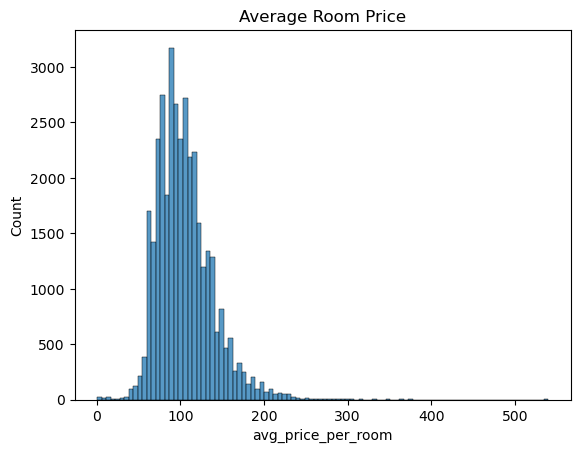

In [21]:
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100).set_title('Average Room Price')

### Guest Information & Cancellation

Text(0.5, 1.0, 'Number of Children')

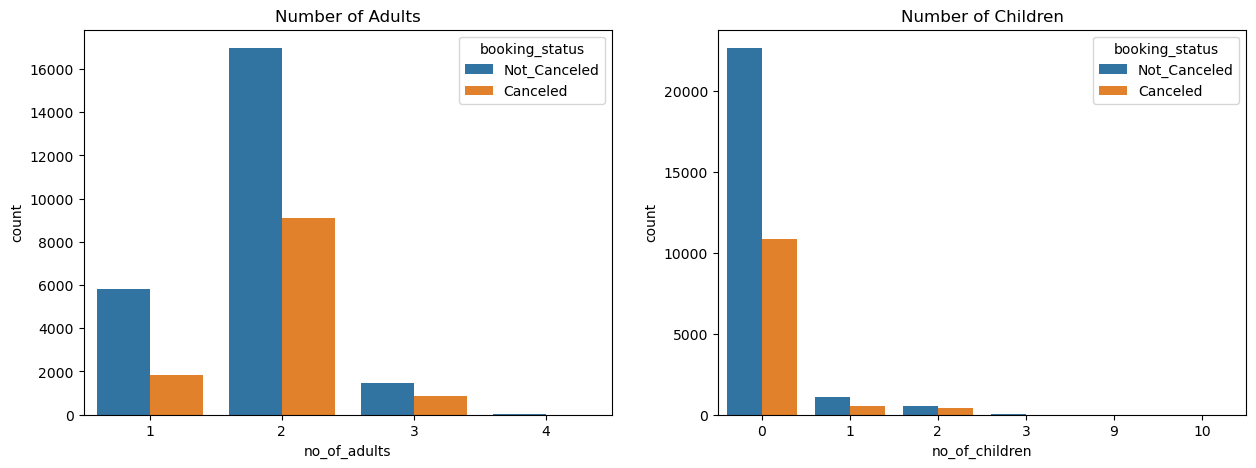

In [22]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = df, ax=ax[0], hue= 'booking_status').set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = df, ax=ax[1], hue = 'booking_status').set_title('Number of Children')

### Time Spent At Hotel & Cancellation

Text(0.5, 1.0, 'Number of Week Nights')

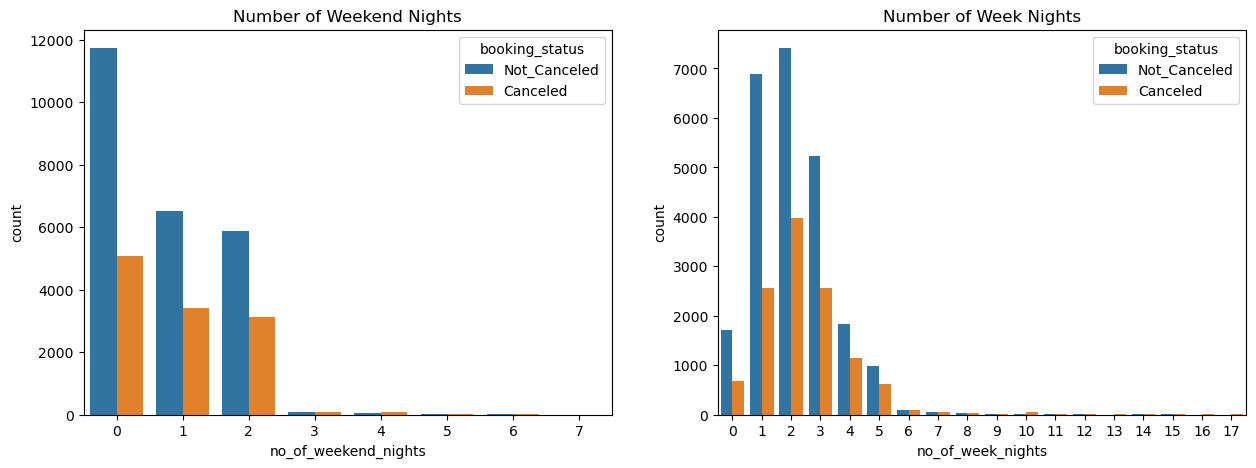

In [23]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = df, ax=ax[0], hue = 'booking_status').set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = df, ax=ax[1], hue = 'booking_status').set_title('Number of Week Nights')

### Date of Arrival & Cancellation

Text(0.5, 1.0, 'Cancellation by day of week in 2018')

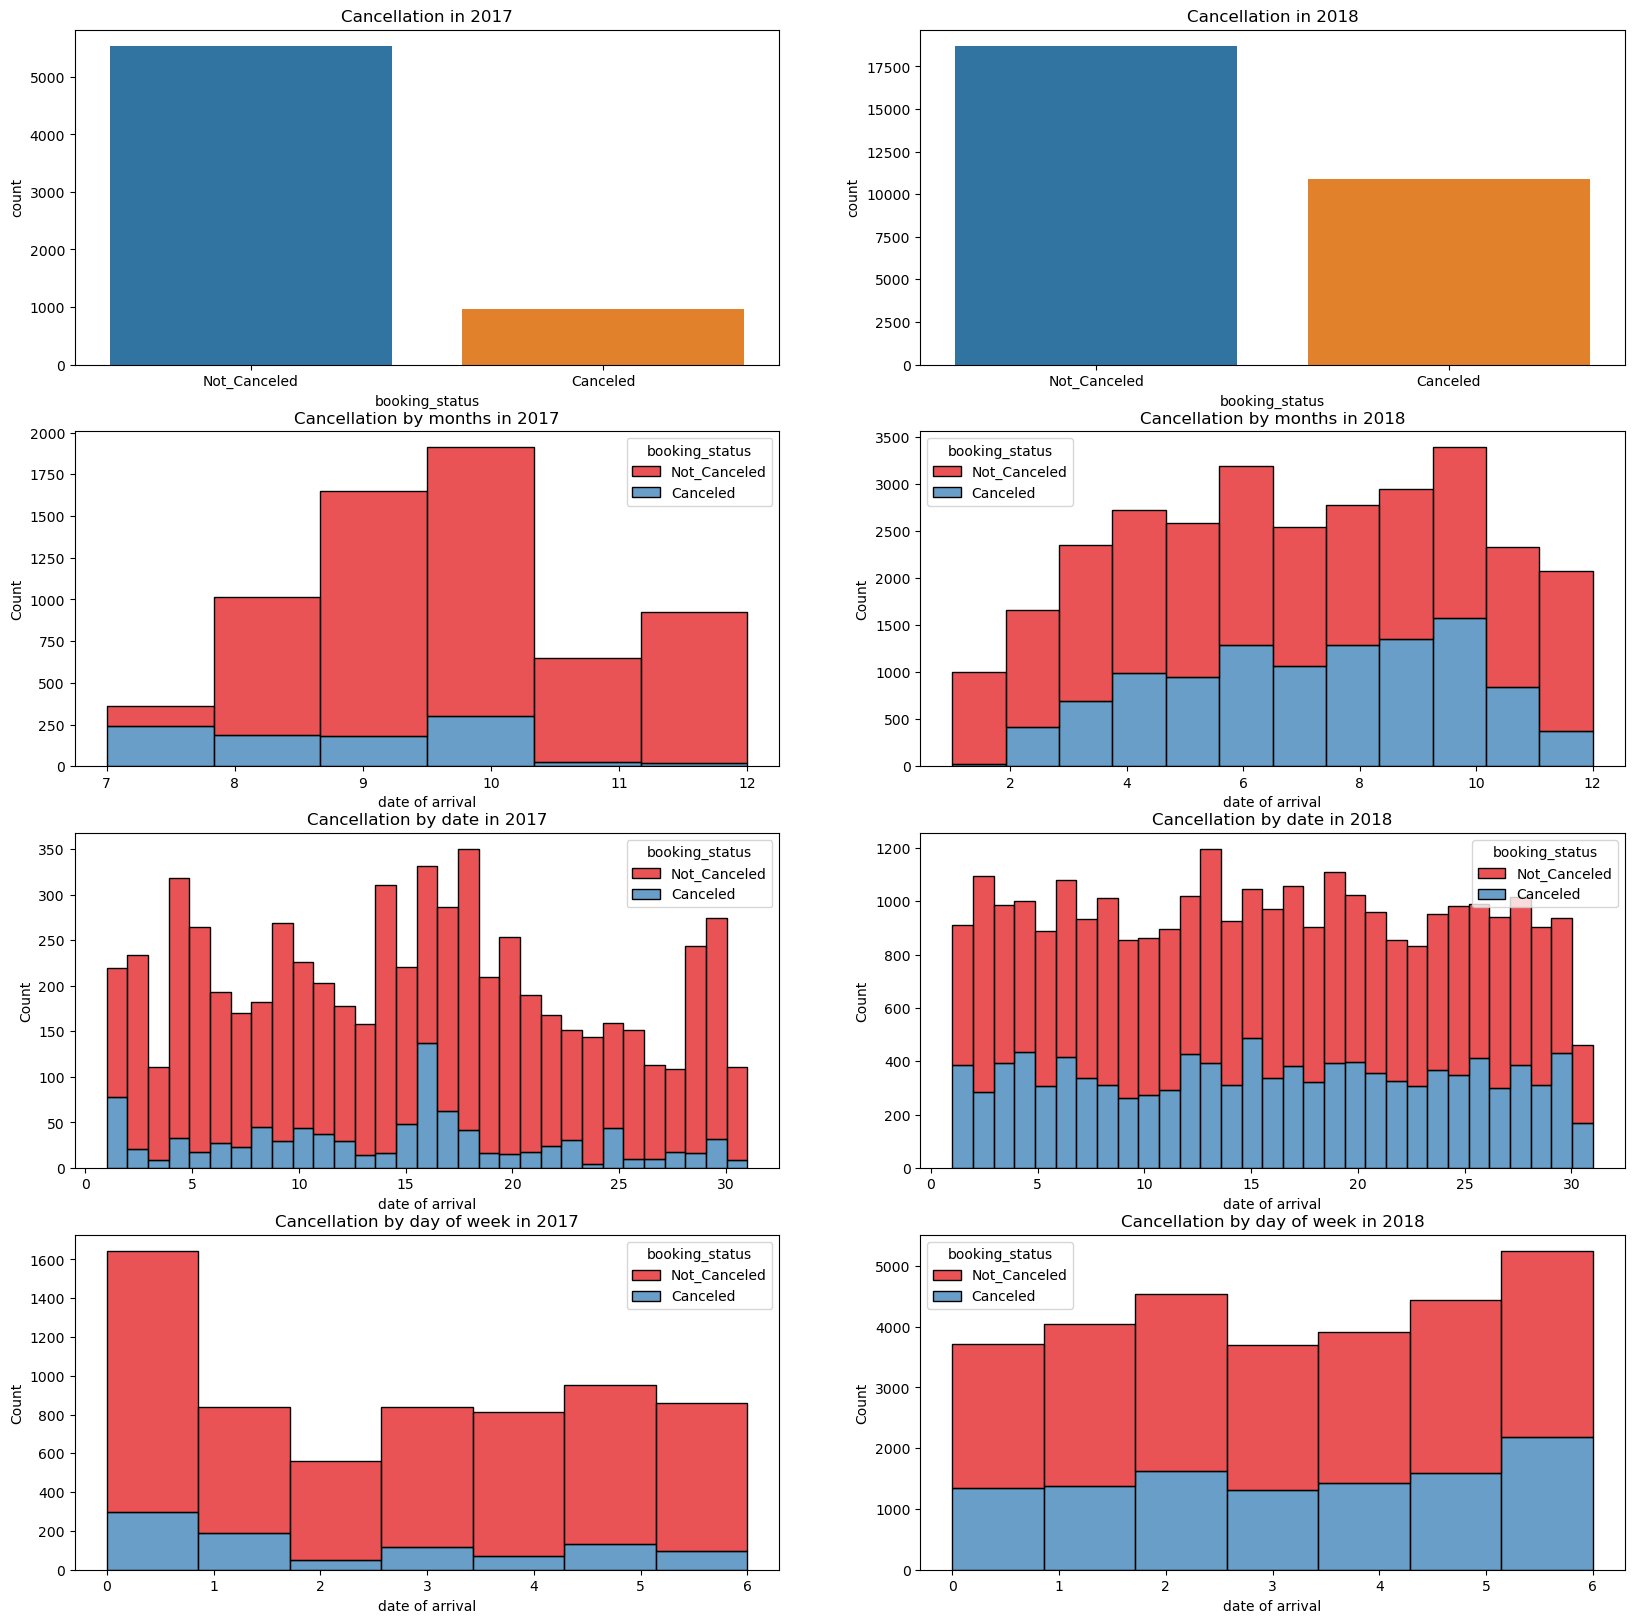

In [24]:
fig,ax = plt.subplots(4,2,figsize=(20,20))
df_2017 = df[df['date of arrival'].dt.year == 2017]
df_2018 = df[df['date of arrival'].dt.year == 2018]


# Year Wise

sns.countplot(x = df_2017['booking_status'], data = df_2017, ax=ax[0,0]).set_title('Cancellation in 2017')
sns.countplot(x = df_2018['booking_status'], data = df_2018, ax=ax[0,1]).set_title('Cancellation in 2018')


# Month Wise

sns.histplot(x = df_2017['date of arrival'].dt.month, data = df_2017, ax=ax[1,0], bins=6, hue = df_2017['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by months in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.month, data = df_2018, ax=ax[1,1], bins=12, hue = df_2018['booking_status'], palette = 'Set1', multiple ='stack').set_title('Cancellation by months in 2018')


# Date Wise

sns.histplot(x = df_2017['date of arrival'].dt.day, data = df_2017, ax=ax[2,0], bins=31, hue = df_2017['booking_status'], palette = 'Set1', multiple='stack').set_title('Cancellation by date in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.day, data = df_2018, ax=ax[2,1], bins=31, hue = df_2018['booking_status'], palette = 'Set1', multiple ='stack').set_title('Cancellation by date in 2018')


# Day of Week Wise

sns.histplot(x = df_2017['date of arrival'].dt.dayofweek, data = df_2017, ax=ax[3,0], bins=7, hue = df_2017['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by day of week in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.dayofweek, data = df_2018, ax=ax[3,1], bins=7, hue = df_2018['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by day of week in 2018')

### Services & Cancellation

Text(0.5, 1.0, 'Number of special requests')

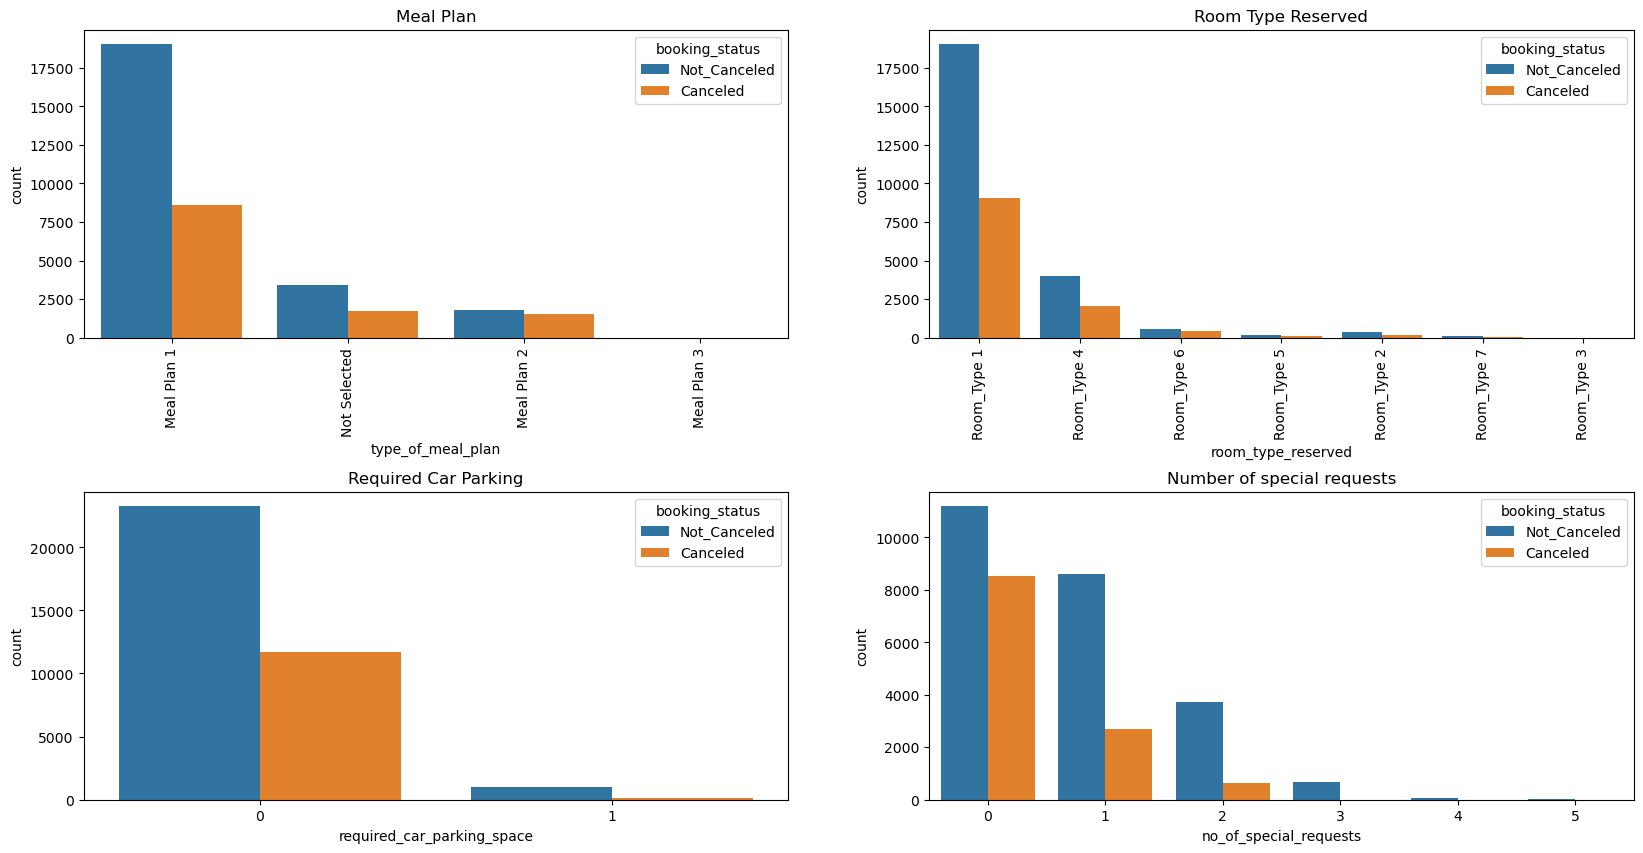

In [25]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x = 'type_of_meal_plan', data = df, ax=ax[0,0], hue = 'booking_status').set_title('Meal Plan')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'room_type_reserved', data = df, ax=ax[0,1], hue = 'booking_status').set_title('Room Type Reserved')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'required_car_parking_space', data = df, ax=ax[1,0], hue = 'booking_status').set_title('Required Car Parking')

sns.countplot(x = 'no_of_special_requests', data = df, ax=ax[1,1], hue = 'booking_status').set_title('Number of special requests')

### Lead Time & Cancellation

Text(0.5, 1.0, 'Lead Time in days')

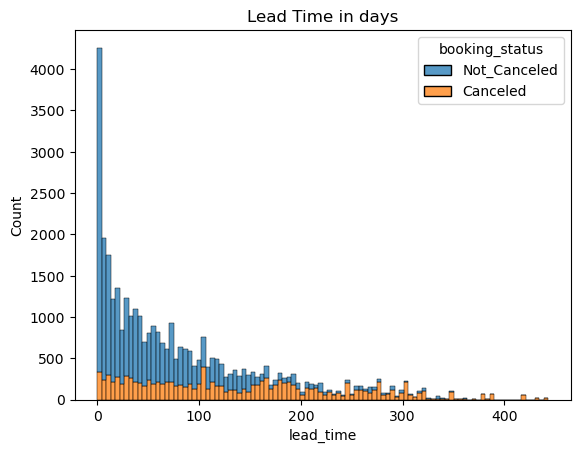

In [26]:
sns.histplot(x = 'lead_time', data = df, bins=100, hue = 'booking_status', multiple = 'stack').set_title('Lead Time in days')

### Market Segment & Cancellation

Text(0.5, 1.0, 'Market Segment Type')

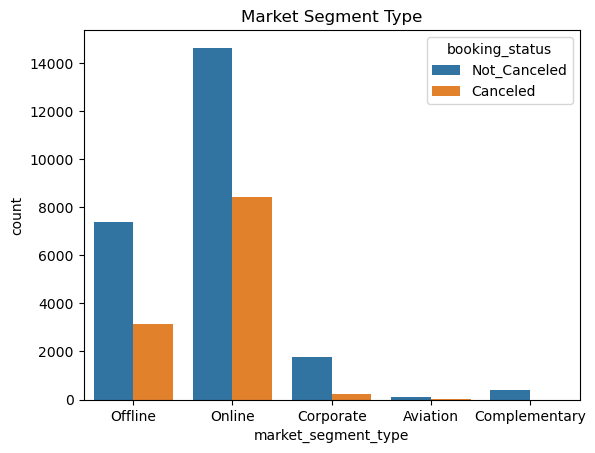

In [27]:
sns.countplot(x = 'market_segment_type', data = df, hue = 'booking_status').set_title('Market Segment Type')

This graph shows the market segment of reservations and cancellation. Here most of the reservations are made through online platforms and thus it has the most number of cancellations. The second most common market segment is offline, which has the second most number of cancellations.

### Guest's Previous Experience & Cancellation

Text(0.5, 1.0, 'Repeated Guest')

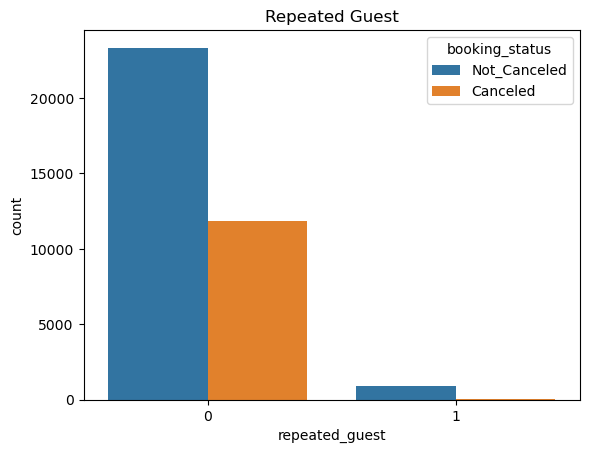

In [28]:
sns.countplot(x = 'repeated_guest', data = df, hue = 'booking_status').set_title('Repeated Guest')

### Average Room Price & Cancellation

Text(0.5, 1.0, 'Average Room Price')

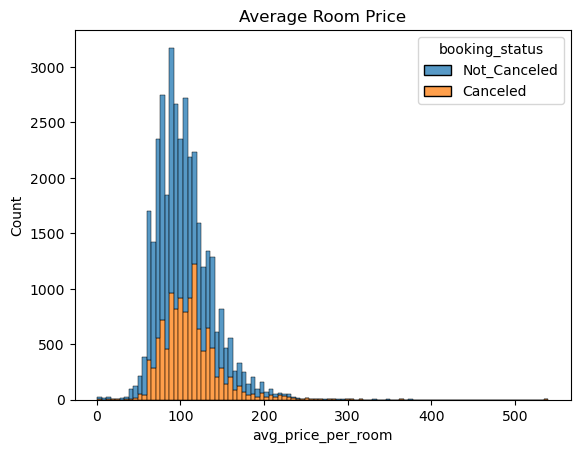

In [29]:
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100, hue = 'booking_status', multiple = 'stack').set_title('Average Room Price')

## Data Preprocessing

### Outlier Removal using IQR

In [30]:
# Columns For Outlier Removal

cols = ['lead_time', 'avg_price_per_room']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Removing Outliers

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder


# Label Encoding Object

le = LabelEncoder()


# Columns To Be Encoded

cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


# Label Encoding

for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

type_of_meal_plan [0 3 1 2]
room_type_reserved [0 3 5 4 1 6 2]
market_segment_type [3 4 2 0 1]
booking_status [1 0]


### Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler


# Standardizing The Data

scaler = StandardScaler()
df[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(df[['lead_time', 'avg_price_per_room']])

## Correlation Matrix Heatmap

<Axes: >

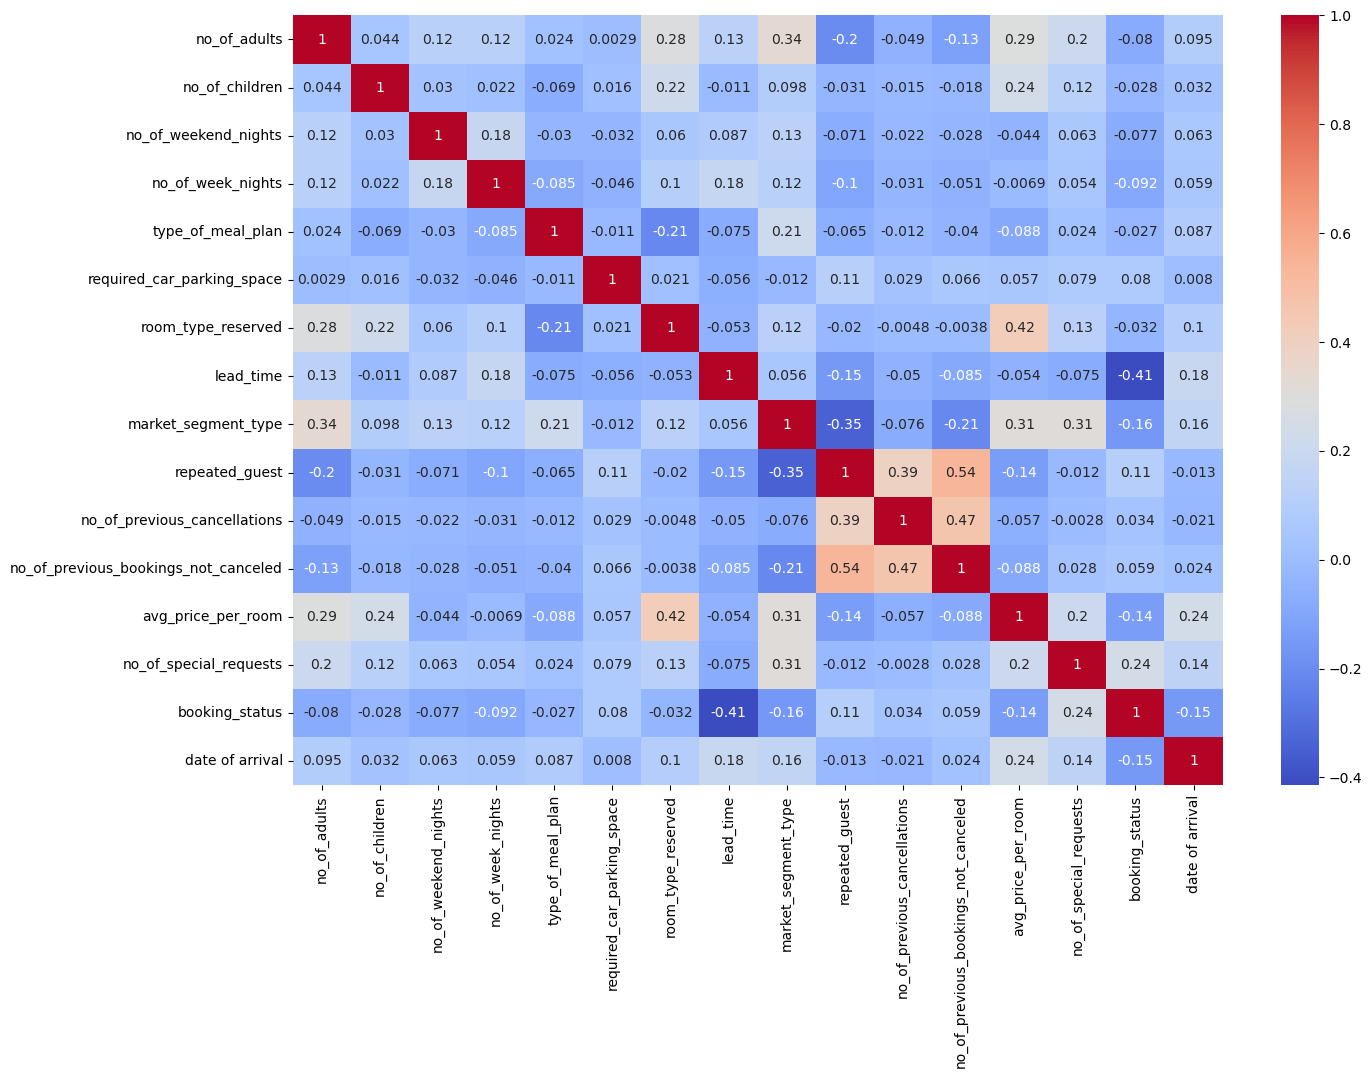

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [34]:
# Having Issue With The Model Training Due To This Column

df.drop(columns=['date of arrival'], inplace=True)

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('booking_status', axis=1), df['booking_status'], test_size=0.2, random_state=42)

## Model Building

### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

#### Hyperparameter Tuning using GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

grid_search = GridSearchCV(estimator=dtree, param_grid=grid_param, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [38]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

dtree.fit(X_train, y_train)

print(dtree.score(X_train, y_train))

d_pred = dtree.predict(X_test)

0.85635687732342


### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

#### Hyperparameter Tuning using GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=grid_param, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [41]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))

r_pred = rfc.predict(X_test)

0.850185873605948


### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

Hyperparameter Tuning using GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'random_state' : [0,42]
}

grid_search = GridSearchCV(estimator=logreg, param_grid=grid_param, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
630 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver 

{'C': 1, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}


In [44]:
logreg = LogisticRegression(C=1, penalty='l2', random_state=0, solver='liblinear')

logreg.fit(X_train, y_train)

print(logreg.score(X_train, y_train))

l_pred = logreg.predict(X_test)

0.7956877323420074


## Model Evaluation

### Confusion Matrix Heatmap

Text(0.5, 1.0, 'Logistic Regression')

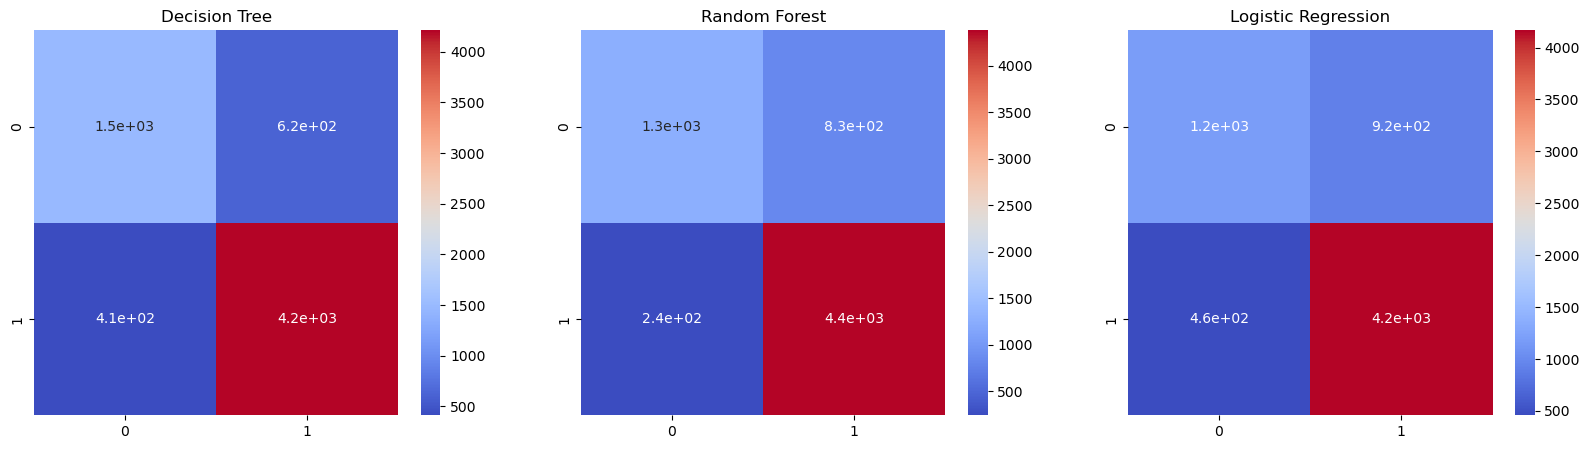

In [45]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,3,figsize=(20,5))


# Decision Tree
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='coolwarm', ax=ax[0]).set_title('Decision Tree')


# Random Forest
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, cmap='coolwarm', ax=ax[1]).set_title('Random Forest')


# Logistic Regression
sns.heatmap(confusion_matrix(y_test, l_pred), annot=True, cmap='coolwarm', ax=ax[2]).set_title('Logistic Regression')

### Distribution Plot

C:\Users\admin\AppData\Local\Temp\ipykernel_8448\2625978758.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax=ax[0], hist= False).set_title('Decision Tree')
C:\Users\admin\AppData\Local\Temp\ipykernel_8448\2625978758.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

<Axes: title={'center': 'Logistic Regression'}, xlabel='booking_status', ylabel='Density'>

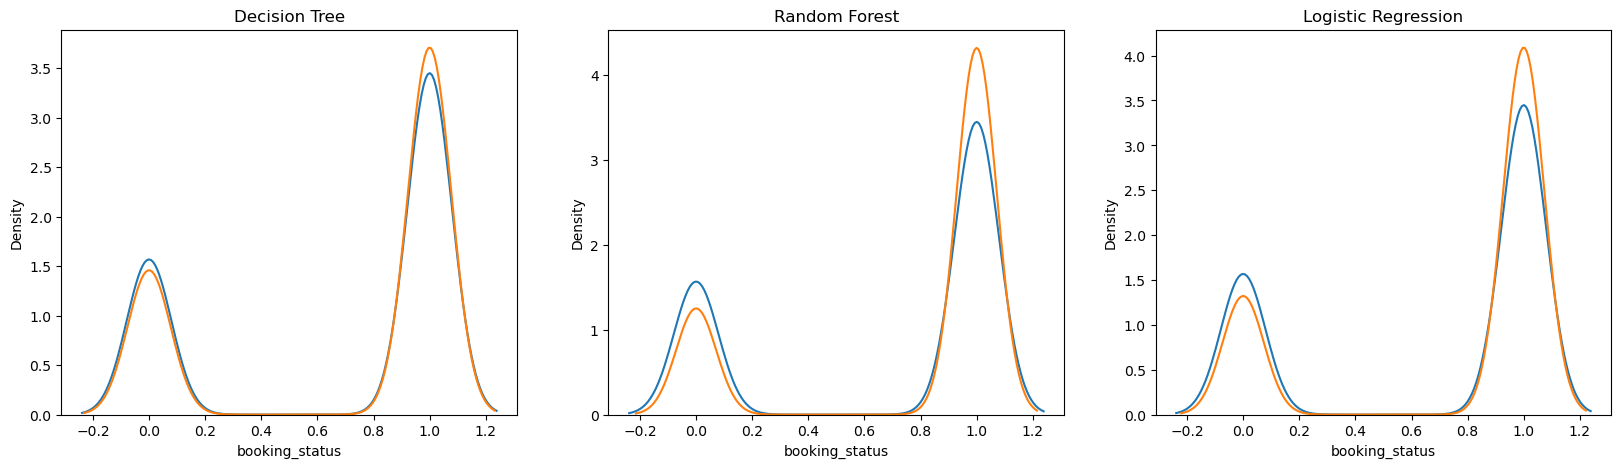

In [46]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))

# Decision Tree

sns.distplot(y_test, ax=ax[0], hist= False).set_title('Decision Tree')
sns.distplot(d_pred, ax=ax[0], hist = False)


# Random Forest

sns.distplot(y_test, ax=ax[1], hist= False).set_title('Random Forest')
sns.distplot(r_pred, ax=ax[1], hist = False)


# Logistic Regression

sns.distplot(y_test, ax=ax[2], hist= False).set_title('Logistic Regression')
sns.distplot(l_pred, ax=ax[2], hist = False)

### Classification Report

In [47]:
from sklearn.metrics import classification_report

# Decision Tree

print('Decision Tree')
print(classification_report(y_test, d_pred))


# Random Forest

print('Random Forest')
print(classification_report(y_test, r_pred))


# Logistic Regression

print('Logistic Regression')
print(classification_report(y_test, l_pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      2101
           1       0.87      0.91      0.89      4624

    accuracy                           0.85      6725
   macro avg       0.83      0.81      0.82      6725
weighted avg       0.84      0.85      0.85      6725

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.60      0.70      2101
           1       0.84      0.95      0.89      4624

    accuracy                           0.84      6725
   macro avg       0.84      0.78      0.80      6725
weighted avg       0.84      0.84      0.83      6725

Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.56      0.63      2101
           1       0.82      0.90      0.86      4624

    accuracy                           0.80      6725
   macro avg       0.77      0.73      0.75      6725
weighted avg       0.79   

### Model Metrics

In [48]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

# Decision Tree

print('Decision Tree')
print('Accuracy Score: ', accuracy_score(y_test, d_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, d_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, d_pred))

print('\n')


# Random Forest

print('Random Forest')
print('Accuracy Score: ', accuracy_score(y_test, r_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, r_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, r_pred))

print('\n')


# Logistic Regression

print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(y_test, l_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, l_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, l_pred))

Decision Tree
Accuracy Score:  0.8472862453531599
Mean Absolute Error:  0.15271375464684014
Mean Squared Error:  0.15271375464684014


Random Forest
Accuracy Score:  0.840446096654275
Mean Absolute Error:  0.15955390334572492
Mean Squared Error:  0.15955390334572492


Logistic Regression
Accuracy Score:  0.7955390334572491
Mean Absolute Error:  0.20446096654275092
Mean Squared Error:  0.20446096654275092


### Model Comparison

Text(0.5, 1.0, 'Mean Squared Error')

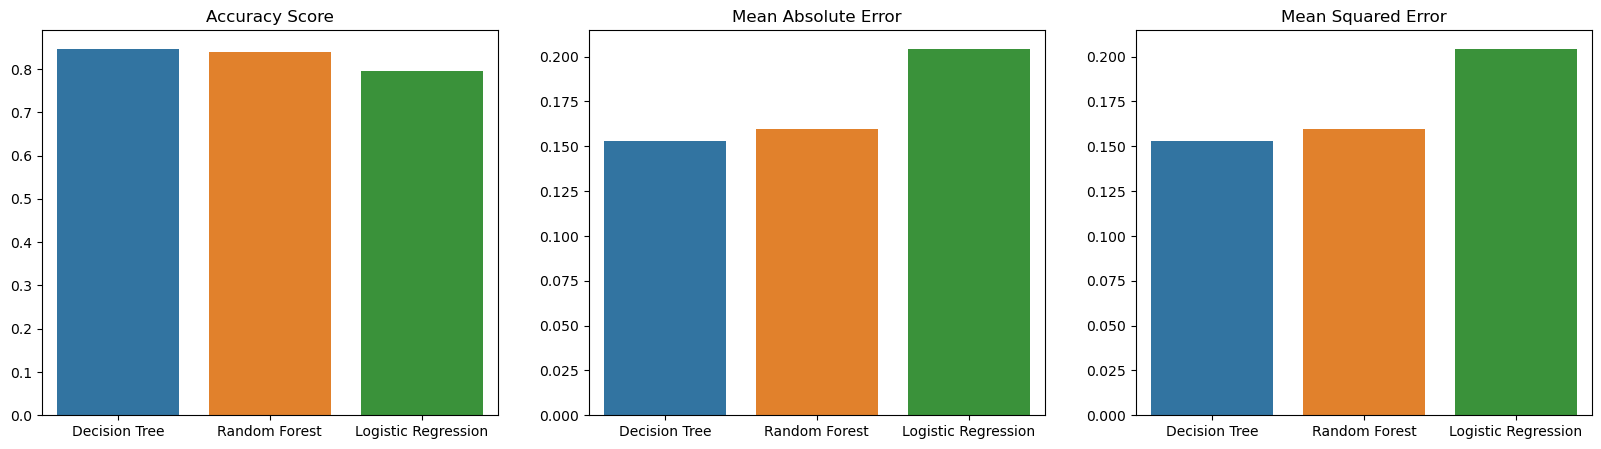

In [49]:
fig, ax = plt.subplots(1,3,figsize=(20,5))


# Accuracy Score

sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [accuracy_score(y_test, d_pred), accuracy_score(y_test, r_pred), accuracy_score(y_test, l_pred)], ax=ax[0]).set_title('Accuracy Score')


# Mean Absolute Error

sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_absolute_error(y_test, d_pred), mean_absolute_error(y_test, r_pred), mean_absolute_error(y_test, l_pred)], ax=ax[1]).set_title('Mean Absolute Error')


# Mean Squared Error

sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_squared_error(y_test, d_pred), mean_squared_error(y_test, r_pred), mean_squared_error(y_test, l_pred)], ax=ax[2]).set_title('Mean Squared Error')

### Feature Importance

Text(0.5, 1.0, 'Decision Tree')

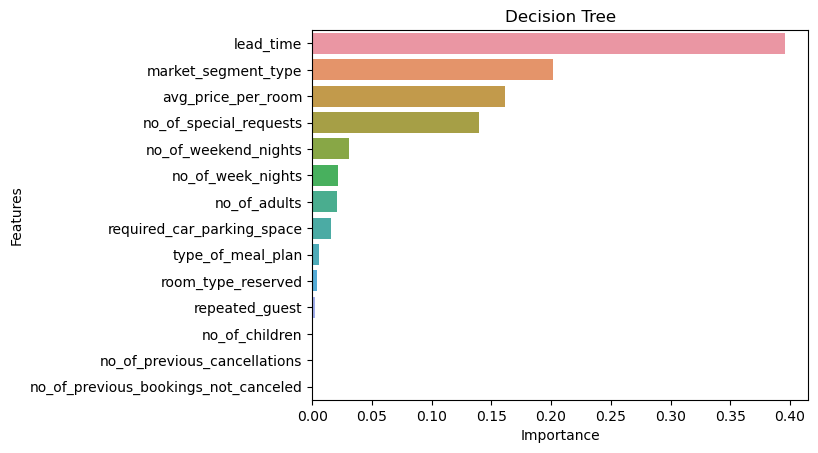

In [50]:
# Decision Tree

feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Decision Tree')

Text(0.5, 1.0, 'Random Forest')

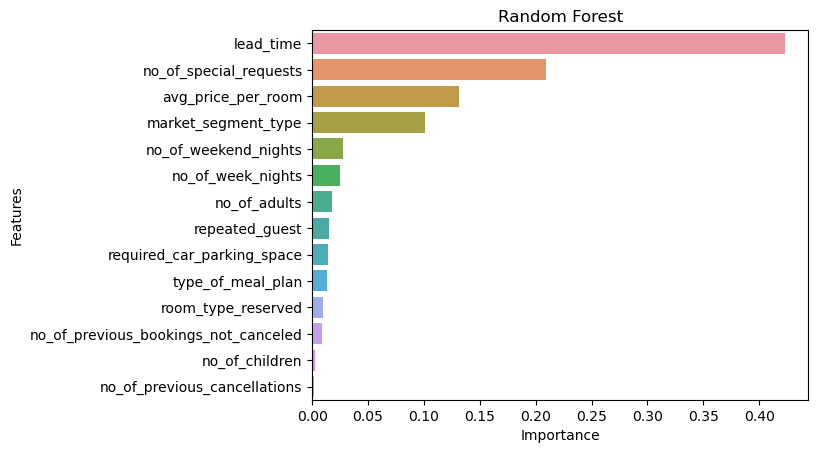

In [51]:
# Random Forest

feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Random Forest')